In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv(r"C:\Users\lenovo\Desktop\python\bank_marketing_updated_v1.csv")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7788\1484885669.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  bank = pd.read_csv(r"C:\Users\lenovo\Desktop\python\bank_marketing_updated_v1.csv")


In [7]:
bank.columns=bank.iloc[0]
bank=bank[1:]
bank=bank.reset_index(drop=True)

In [8]:
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
bank.isnull().sum()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [10]:
mode = bank['response'].mode().values[0]
bank['response']= bank['response'].replace(np.nan, mode)
 
bank.isnull().sum()

0
customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
dtype: int64

In [11]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
bank['response']= label_encoder.fit_transform(bank['response']) 
  
bank['response'].value_counts()

0    39924
1     5287
Name: response, dtype: int64

In [12]:
bank['duration'] = bank['duration'].str.replace(r'\D', '', regex=True)
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261,1,-1,0,unknown,0
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151,1,-1,0,unknown,0
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76,1,-1,0,unknown,0
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92,1,-1,0,unknown,0
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198,1,-1,0,unknown,0


In [13]:
bank[['customerid','age','salary','balance','day','pdays','previous','duration','campaign']]=bank[['customerid','age','salary','balance','day','pdays','previous','duration','campaign']].apply(pd.to_numeric)

In [14]:
bank.fillna(bank.mean(),inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7788\1736081601.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.fillna(bank.mean(),inplace=True)


In [15]:
bank = bank.dropna(axis = 0, how ='any')
print(bank.isnull().sum())
bank.shape

0
customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64


(45161, 19)

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45161 non-null  int64  
 1   age         45161 non-null  float64
 2   salary      45161 non-null  int64  
 3   balance     45161 non-null  int64  
 4   marital     45161 non-null  object 
 5   jobedu      45161 non-null  object 
 6   targeted    45161 non-null  object 
 7   default     45161 non-null  object 
 8   housing     45161 non-null  object 
 9   loan        45161 non-null  object 
 10  contact     45161 non-null  object 
 11  day         45161 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45161 non-null  int64  
 14  campaign    45161 non-null  int64  
 15  pdays       45161 non-null  int64  
 16  previous    45161 non-null  int64  
 17  poutcome    45161 non-null  object 
 18  response    45161 non-null  int32  
dtypes: float64(1), int32(1), 

In [17]:
bank.describe()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,response
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,4.516100e+04,45161.000000,45161.000000,45161.000000,45161.000000
mean,22608.869711,40.938237,57007.107903,1361.960718,15.807511,1.688639e+14,2.763026,40.209141,0.580700,0.116937
std,13049.048243,10.617656,32088.339479,3044.841539,8.323111,2.415383e+14,3.094761,100.143976,2.304587,0.321349
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,0.000000e+00,1.000000,-1.000000,0.000000,0.000000
25%,11310.000000,33.000000,20000.000000,72.000000,8.000000,1.430000e+02,1.000000,-1.000000,0.000000,0.000000
50%,22612.000000,39.000000,60000.000000,448.000000,16.000000,6.550000e+02,2.000000,-1.000000,0.000000,0.000000
75%,33908.000000,48.000000,70000.000000,1428.000000,21.000000,2.716667e+14,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,9.983333e+14,63.000000,871.000000,275.000000,1.000000


In [18]:
bank[['job', 'edu']] = bank['jobedu'].str.split(',', expand=True)
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261,1,-1,0,unknown,0,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151,1,-1,0,unknown,0,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76,1,-1,0,unknown,0,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92,1,-1,0,unknown,0,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198,1,-1,0,unknown,0,unknown,unknown


In [51]:
bank[['month', 'year']] = bank['month'].str.split(',', expand=True)
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,1,-1,0,unknown,0,management,tertiary,middle_age,high,2017
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,1,-1,0,unknown,0,technician,secondary,middle_age,medium,2017
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,1,-1,0,unknown,0,entrepreneur,secondary,adult,high,2017
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,1,-1,0,unknown,0,blue-collar,unknown,middle_age,low,2017
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,1,-1,0,unknown,0,unknown,unknown,adult,NaN,2017


In [19]:
bins=[0,20,40,80,100]
labels=['Teenage','adult','middle_age','old']
bank['age_bin']=pd.cut(bank['age'],bins,labels=labels)

In [20]:
bins=[0,40000,80000,120000]
labels=['low','medium','high']
bank['income_bin']=pd.cut(bank['salary'],bins,labels=labels)

In [21]:
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261,1,-1,0,unknown,0,management,tertiary,middle_age,high
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151,1,-1,0,unknown,0,technician,secondary,middle_age,medium
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76,1,-1,0,unknown,0,entrepreneur,secondary,adult,high
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92,1,-1,0,unknown,0,blue-collar,unknown,middle_age,low
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,198,1,-1,0,unknown,0,unknown,unknown,adult,NaN


In [22]:
bank.describe()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,response
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,4.516100e+04,45161.000000,45161.000000,45161.000000,45161.000000
mean,22608.869711,40.938237,57007.107903,1361.960718,15.807511,1.688639e+14,2.763026,40.209141,0.580700,0.116937
std,13049.048243,10.617656,32088.339479,3044.841539,8.323111,2.415383e+14,3.094761,100.143976,2.304587,0.321349
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,0.000000e+00,1.000000,-1.000000,0.000000,0.000000
25%,11310.000000,33.000000,20000.000000,72.000000,8.000000,1.430000e+02,1.000000,-1.000000,0.000000,0.000000
50%,22612.000000,39.000000,60000.000000,448.000000,16.000000,6.550000e+02,2.000000,-1.000000,0.000000,0.000000
75%,33908.000000,48.000000,70000.000000,1428.000000,21.000000,2.716667e+14,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,9.983333e+14,63.000000,871.000000,275.000000,1.000000


### finding outliers and removing 


In [25]:
cont=bank.select_dtypes(include=np.number)

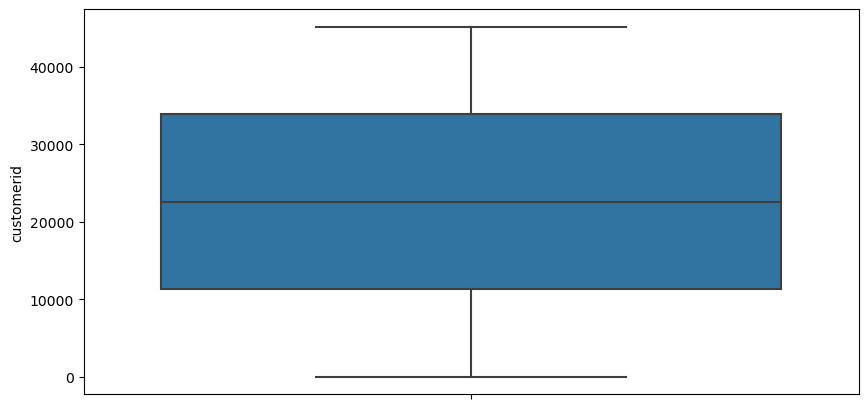

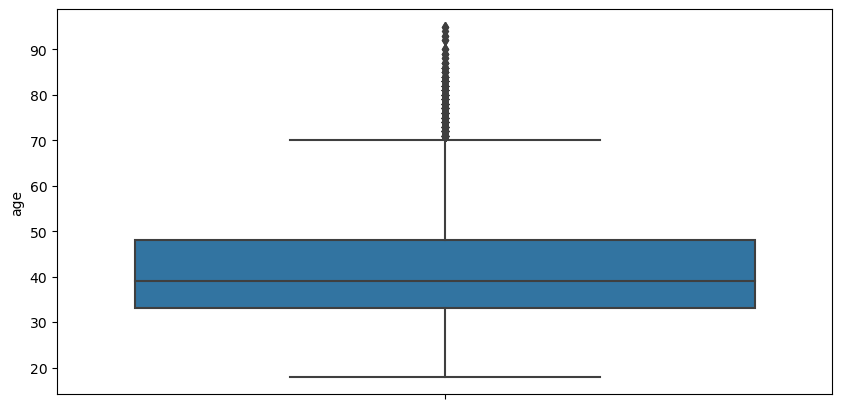

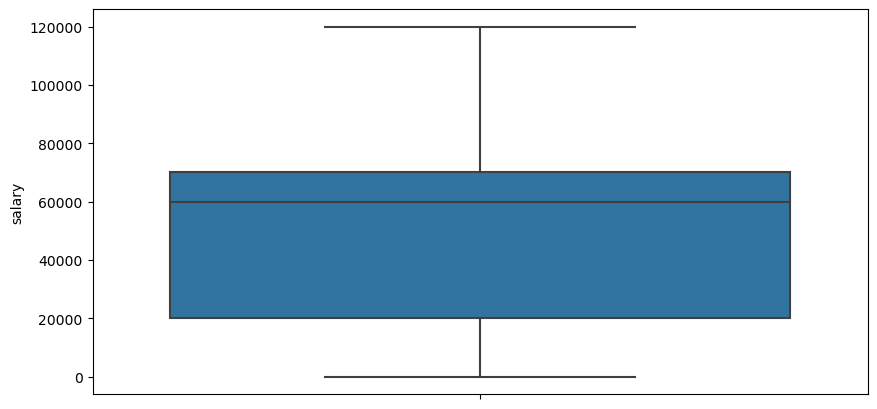

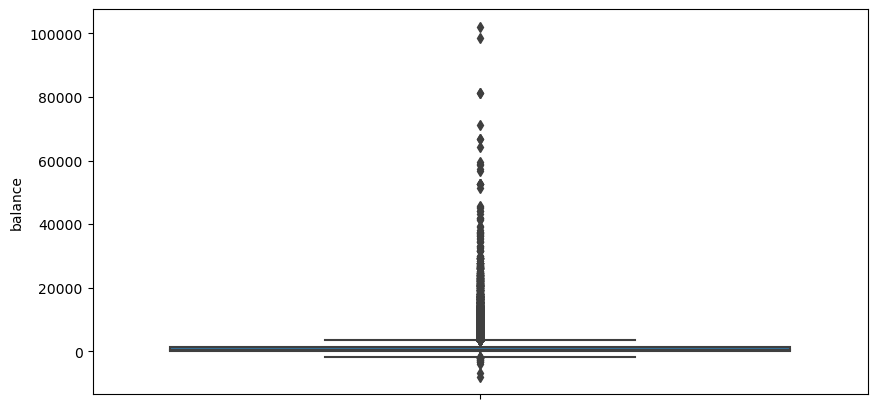

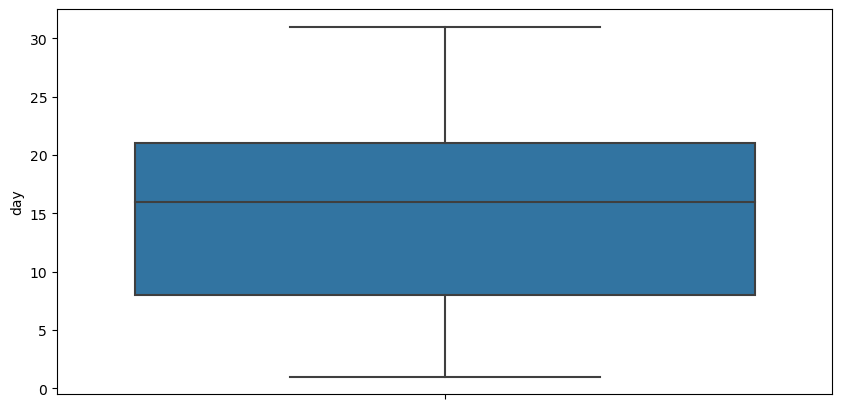

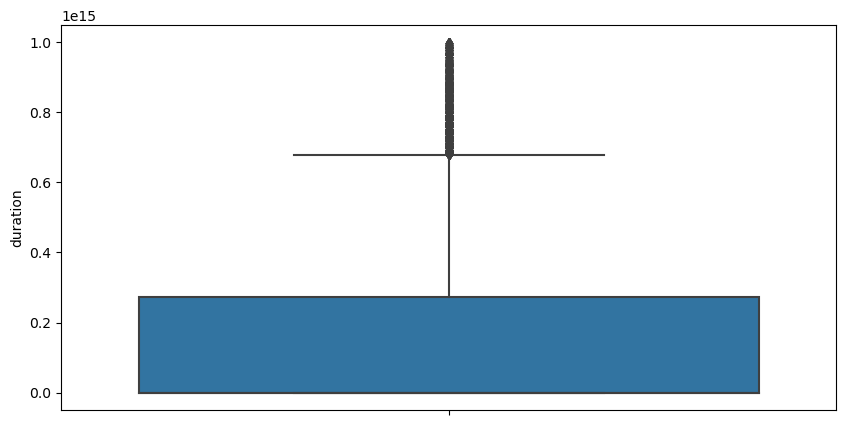

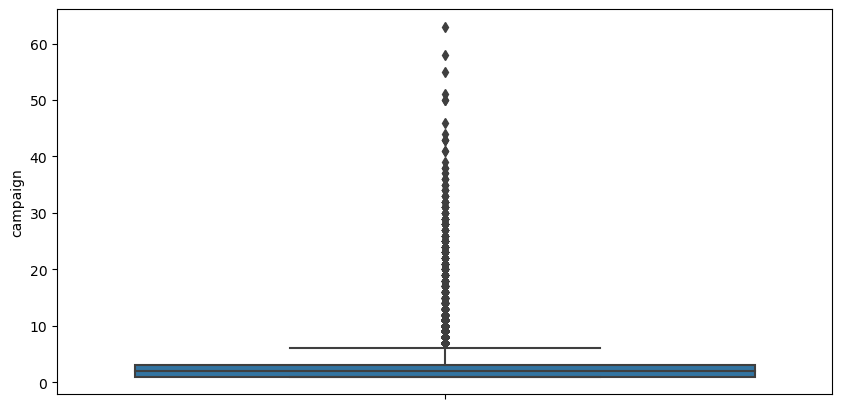

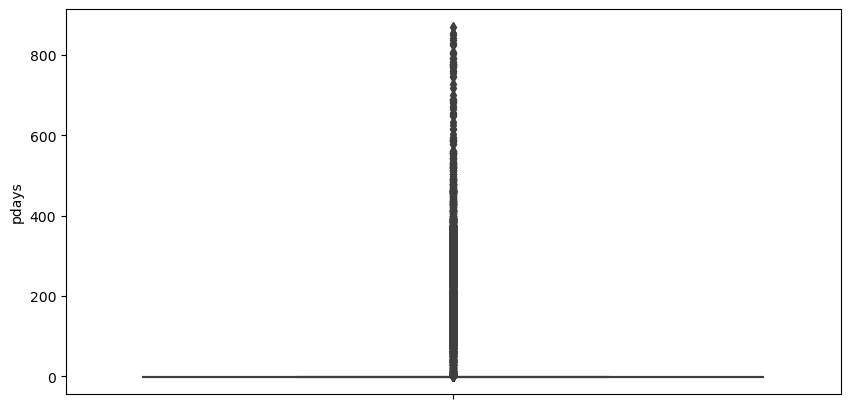

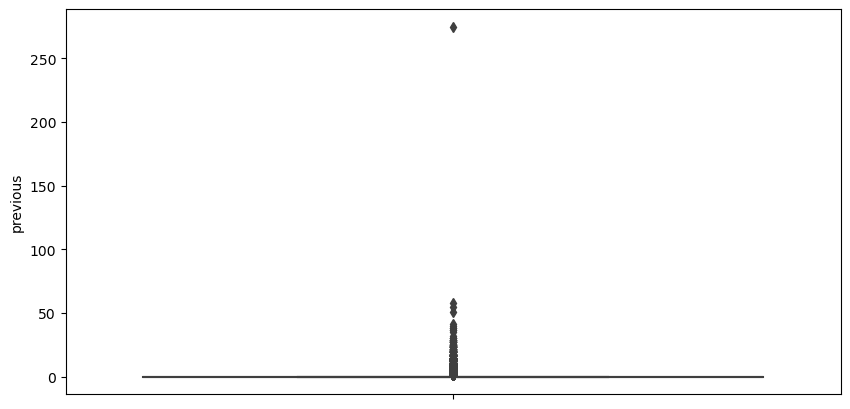

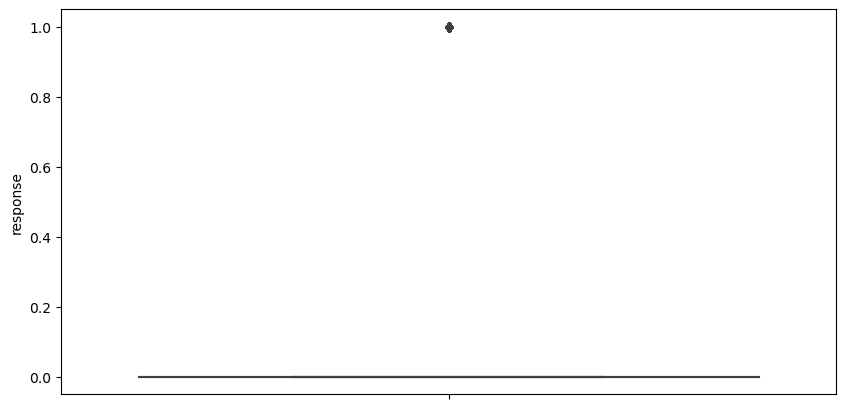

In [26]:
for i in cont:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=i,data=bank)
    plt.show()

## Treatment of oulier

In [41]:
#finding upperlimit and lower limit
ul=bank['age'].mean()+(3* bank['age'].std())
ll=bank['age'].mean()-(3* bank['age'].std())
print(ul,ll)

72.79120612273897 9.085267516820778


In [42]:
#finding outliers
bank[(bank['age']<=ll)|(bank['age']>=ul)]

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin
29158,29159,83.0,55000,425,married,"retired,primary",yes,no,no,no,...,152,1,-1,0,unknown,0,retired,primary,old,medium
29261,29262,75.0,55000,46,divorced,"retired,primary",yes,no,no,no,...,49,1,-1,0,unknown,0,retired,primary,middle_age,medium
29263,29264,75.0,55000,3324,married,"retired,primary",yes,no,no,no,...,248333333333333,1,-1,0,unknown,0,retired,primary,middle_age,medium
29322,29323,83.0,55000,6236,married,"retired,tertiary",yes,no,no,no,...,471666666666667,2,-1,0,unknown,0,retired,tertiary,old,medium
29865,29866,75.0,55000,3881,divorced,"retired,primary",yes,no,yes,no,...,226666666666667,3,-1,0,unknown,1,retired,primary,middle_age,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,45110,78.0,100000,1780,married,"management,unknown",no,no,yes,no,...,351666666666667,2,185,7,success,1,management,unknown,middle_age,high
45118,45119,78.0,55000,14204,married,"retired,primary",yes,no,no,no,...,25,1,183,1,other,0,retired,primary,middle_age,medium
45141,45142,77.0,0,397,married,"unknown,unknown",no,no,no,no,...,345,1,185,3,success,0,unknown,unknown,middle_age,NaN
45191,45192,75.0,55000,3810,divorced,"retired,tertiary",no,no,yes,no,...,436666666666667,1,183,1,failure,1,retired,tertiary,middle_age,medium


In [45]:
#removing outlier
bank[(bank['age']>=ll)&(bank['age']<=ul)]

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261,1,-1,0,unknown,0,management,tertiary,middle_age,high
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151,1,-1,0,unknown,0,technician,secondary,middle_age,medium
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76,1,-1,0,unknown,0,entrepreneur,secondary,adult,high
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92,1,-1,0,unknown,0,blue-collar,unknown,middle_age,low
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,198,1,-1,0,unknown,0,unknown,unknown,adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,162833333333333,3,-1,0,unknown,1,technician,tertiary,middle_age,medium
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,...,76,2,-1,0,unknown,1,retired,primary,middle_age,medium
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,...,187833333333333,5,184,3,success,1,retired,secondary,middle_age,medium
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,846666666666667,4,-1,0,unknown,0,blue-collar,secondary,middle_age,low


In [46]:
ul=bank['duration'].mean()+(3* bank['duration'].std())
ll=bank['duration'].mean()-(3* bank['duration'].std())
print(ul,ll)

893478779847695.5 -555750991121168.75


In [48]:
bank[(bank['duration']<=ll)|(bank['duration']>=ul)]

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin
14131,14132,55.0,55000,991,married,"retired,secondary",yes,no,no,no,...,988333333333333,2,-1,0,unknown,0,retired,secondary,middle_age,medium
14188,14189,40.0,20000,178,married,"blue-collar,secondary",yes,no,yes,no,...,991666666666667,2,-1,0,unknown,0,blue-collar,secondary,adult,low
14260,14261,50.0,50000,3258,married,"admin.,secondary",yes,no,no,yes,...,933333333333333,2,-1,0,unknown,0,admin.,secondary,middle_age,medium
14325,14326,34.0,100000,344,single,"management,tertiary",no,no,no,no,...,933333333333333,3,-1,0,unknown,0,management,tertiary,adult,high
14327,14328,45.0,20000,91,single,"blue-collar,secondary",yes,no,no,yes,...,916666666666667,2,-1,0,unknown,0,blue-collar,secondary,middle_age,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44847,44848,27.0,100000,802,married,"management,tertiary",yes,no,no,no,...,948333333333333,1,-1,0,unknown,1,management,tertiary,adult,high
44938,44939,47.0,16000,3232,single,"housemaid,tertiary",no,no,no,no,...,901666666666667,1,204,3,failure,0,housemaid,tertiary,middle_age,low
45082,45083,66.0,55000,8,married,"retired,primary",yes,no,no,no,...,933333333333333,2,-1,0,unknown,0,retired,primary,middle_age,medium
45084,45085,29.0,20000,455,single,"blue-collar,tertiary",no,no,no,no,...,903333333333333,4,148,3,success,1,blue-collar,tertiary,adult,low


In [49]:
#removing outlier
bank[(bank['duration']>=ll)&(bank['duration']<=ul)]

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,age_bin,income_bin
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261,1,-1,0,unknown,0,management,tertiary,middle_age,high
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151,1,-1,0,unknown,0,technician,secondary,middle_age,medium
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76,1,-1,0,unknown,0,entrepreneur,secondary,adult,high
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92,1,-1,0,unknown,0,blue-collar,unknown,middle_age,low
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,198,1,-1,0,unknown,0,unknown,unknown,adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,162833333333333,3,-1,0,unknown,1,technician,tertiary,middle_age,medium
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,...,76,2,-1,0,unknown,1,retired,primary,middle_age,medium
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,...,187833333333333,5,184,3,success,1,retired,secondary,middle_age,medium
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,846666666666667,4,-1,0,unknown,0,blue-collar,secondary,middle_age,low


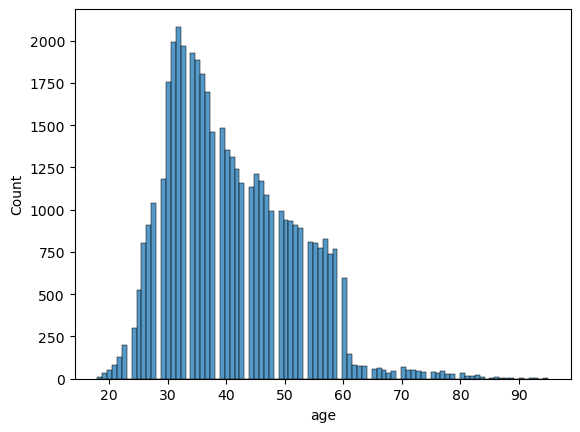

In [28]:
sns.histplot(x='age', data=bank, )
plt.show()

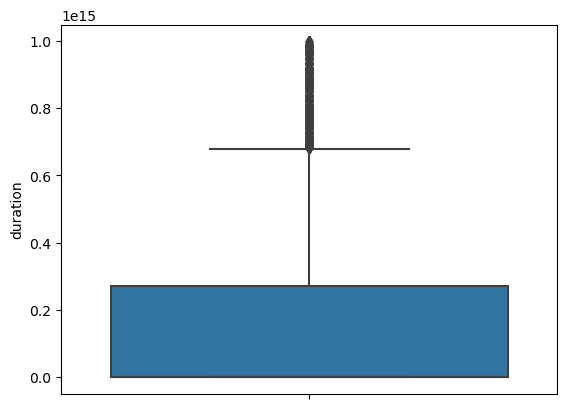

In [50]:
sns.boxplot( y="duration", data=bank )
plt.show()

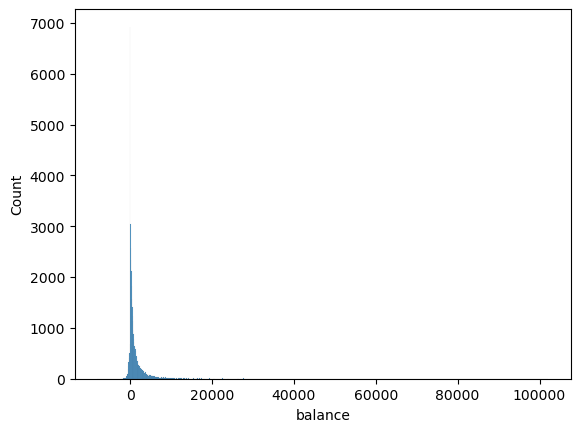

In [30]:
sns.histplot(x='balance', data=bank )
plt.show()

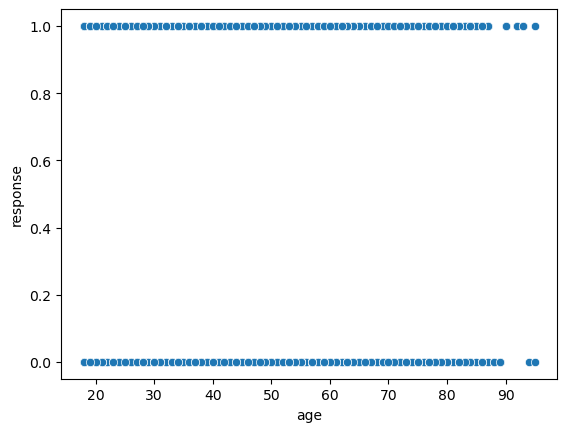

In [40]:
sns.scatterplot(x='age',y='response',data=bank)
plt.show()

<Axes: xlabel='marital,response'>

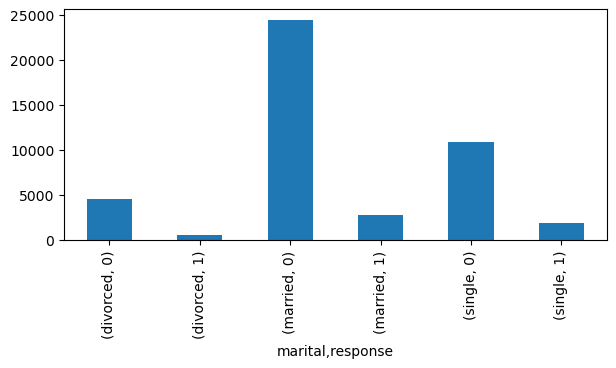

In [31]:
plt.figure(figsize=(7,3))
bank.groupby('marital')['response'].value_counts().plot(kind="bar")

<Axes: >

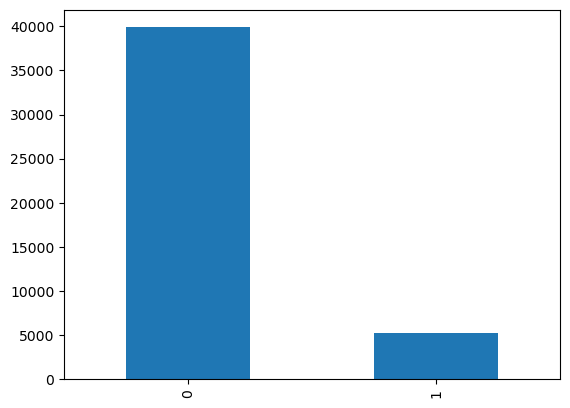

In [32]:
bank['response'].value_counts().plot(kind='bar')

## Temporal Analysis

<Axes: xlabel='month'>

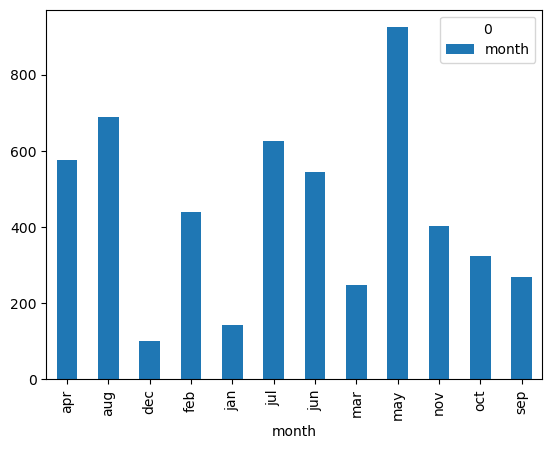

In [58]:
bank[bank['response']== 1].groupby(['month']).agg({'month':'count'}).plot(kind='bar')

<Axes: xlabel='day'>

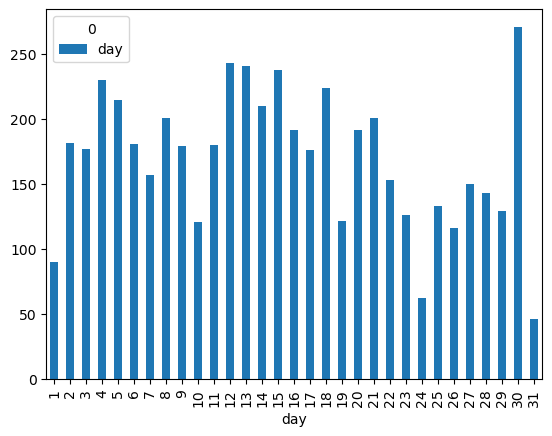

In [60]:
bank[bank['response']== 1].groupby(['day']).agg({'day':'count'}).plot(kind='bar')

<Axes: xlabel='response', ylabel='count'>

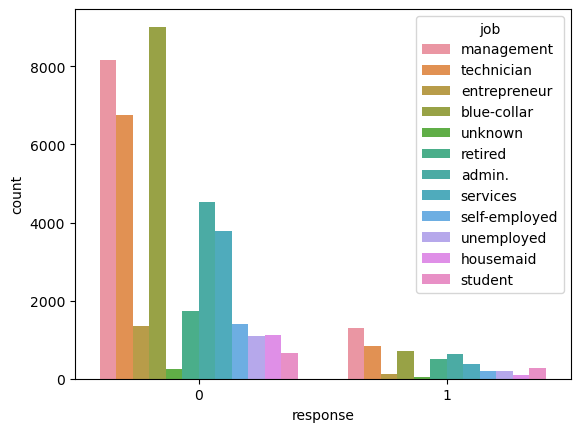

In [34]:
sns.countplot(x='response',hue='job',data = bank)

<Axes: xlabel='edu,response'>

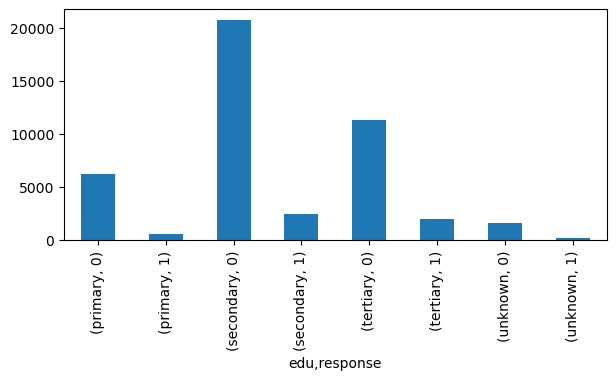

In [35]:
plt.figure(figsize=(7,3))
bank.groupby('edu')['response'].value_counts().plot(kind="bar")

<Axes: xlabel='response', ylabel='count'>

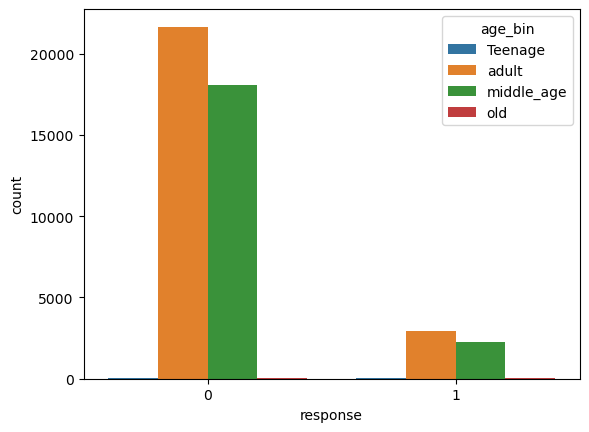

In [36]:
sns.countplot(x='response',hue='age_bin',data = bank)

<Axes: ylabel='income vs response'>

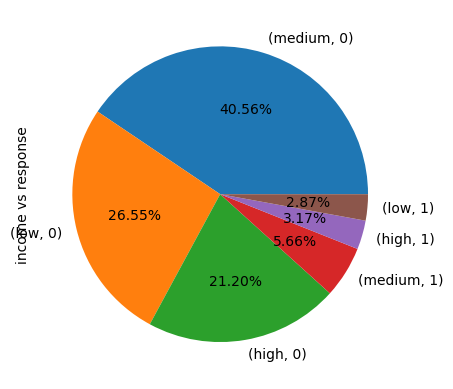

In [27]:
bank[['income_bin','response']].value_counts().plot.pie(ylabel='income vs response',autopct='%.2f%%')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7788\529309082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(),annot=True)


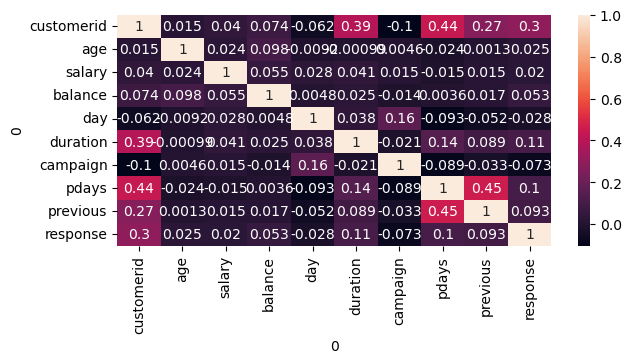

In [38]:
plt.figure(figsize=(7,3))
sns.heatmap(bank.corr(),annot=True)
plt.show()

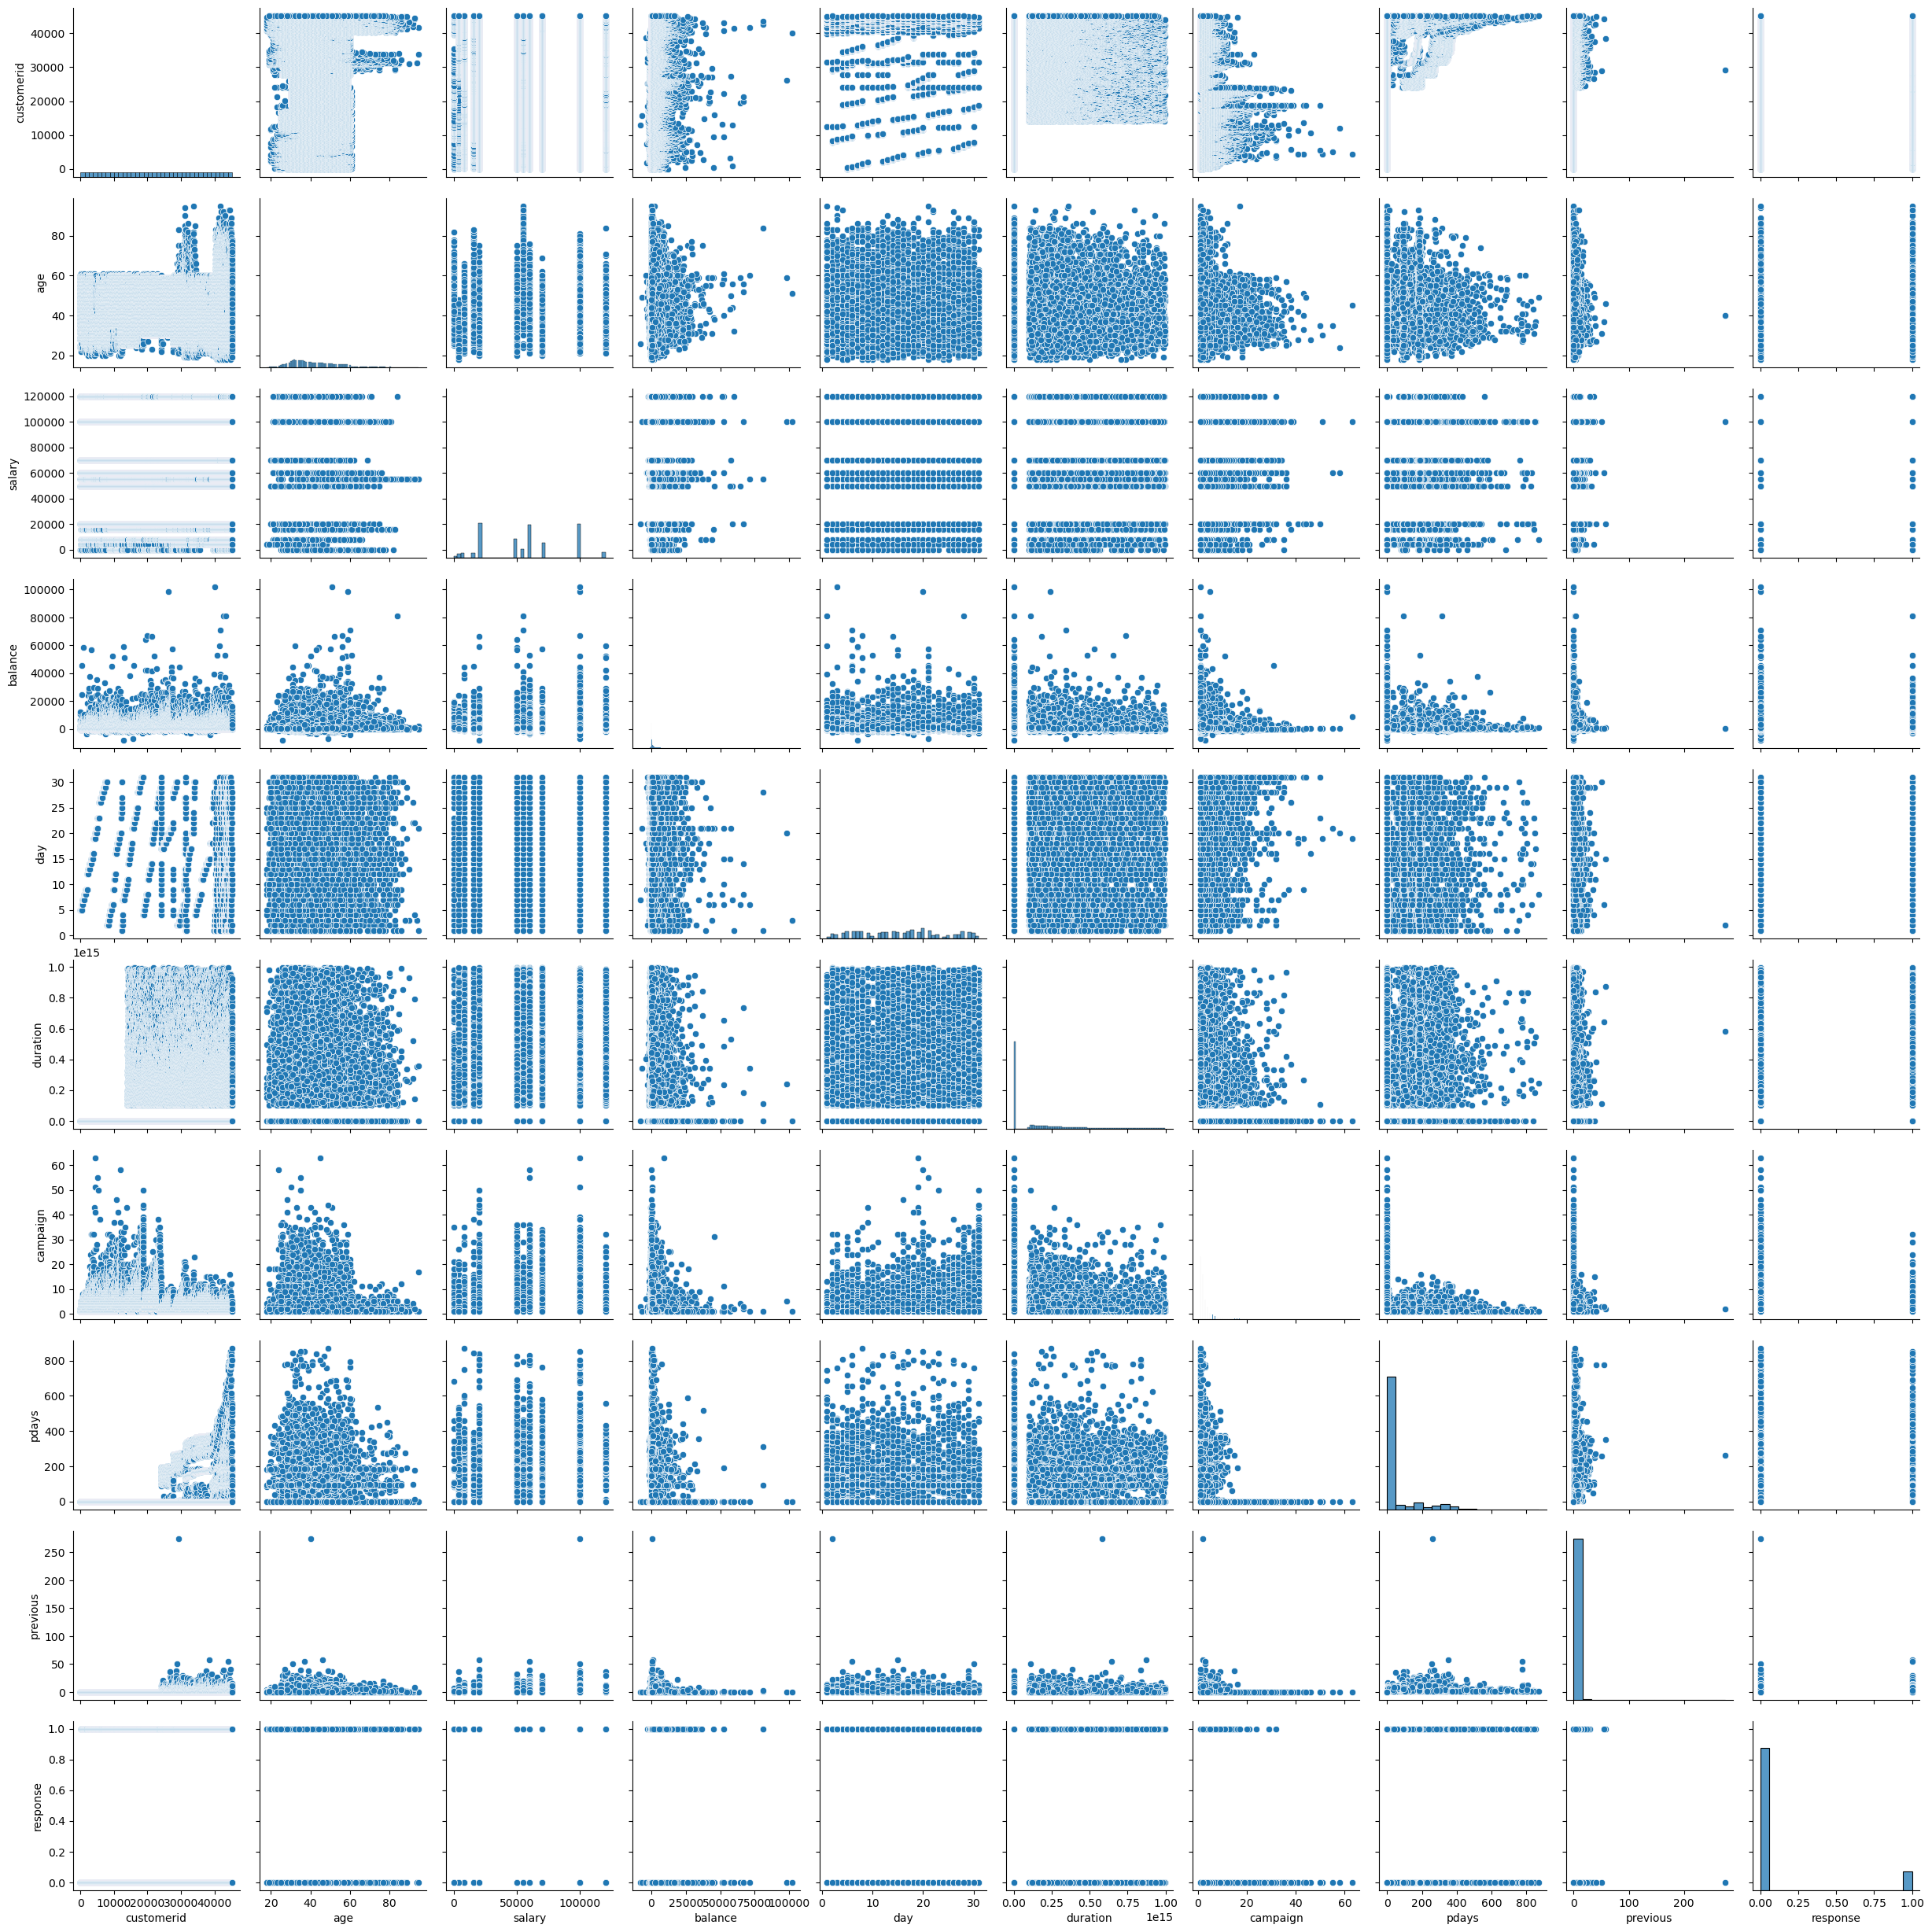

In [39]:
sns.pairplot(cont)